In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import torch

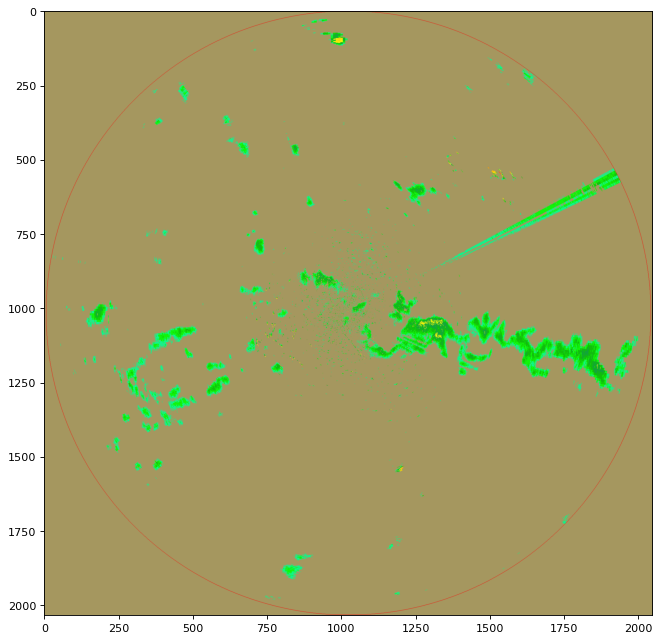

In [2]:
pic2 = cv2.imread("./data/bkk_radar_images/bkk_radar_images_1/1592461954.png")

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def radar_colormap():
    nws_reflectivity_colors = np.array([
    (165, 151, 95), # ND
    (0, 255, 128), # 5.5
    (0, 255, 0), # 10
    (0, 175, 0), # 15
    (0, 150, 50), # 20
    (255, 255, 0), # 25
    (255, 200, 0), # 30
    (255, 170, 0), # 35
    (255, 85, 0), # 40
    (255, 0, 0), # 45
    (255, 0, 100), # 50
    (255, 0, 255), # 55
    (255, 128, 255), # 60
    (255, 200, 255), # 65
    (255, 225, 255), # 70
    (255, 255, 255) # 75
    ])
    return torch.tensor(nws_reflectivity_colors)
    # return mpl.colors.ListedColormap(nws_reflectivity_colors)

dBZmap = torch.tensor([0,5.5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])*255/75

In [4]:
radar_colormap()/255

tensor([[0.6471, 0.5922, 0.3725],
        [0.0000, 1.0000, 0.5020],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.6863, 0.0000],
        [0.0000, 0.5882, 0.1961],
        [1.0000, 1.0000, 0.0000],
        [1.0000, 0.7843, 0.0000],
        [1.0000, 0.6667, 0.0000],
        [1.0000, 0.3333, 0.0000],
        [1.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.3922],
        [1.0000, 0.0000, 1.0000],
        [1.0000, 0.5020, 1.0000],
        [1.0000, 0.7843, 1.0000],
        [1.0000, 0.8824, 1.0000],
        [1.0000, 1.0000, 1.0000]])

In [5]:
# mpl.colors.ListedColormap(radar_colormap()/255)

In [6]:
def color2dBZ(rgb, dBZmap):
    w, h, c = rgb.shape
    rgb = rgb.reshape(-1, c)
    rgb = torch.Tensor(rgb)
    cmap = radar_colormap().unsqueeze(0)
    repeated_rgb = rgb.unsqueeze(1).repeat(1,16,1)
    rgb_diff2 = ((repeated_rgb - cmap)**2).mean(axis=2)
    return dBZmap[torch.argmin(rgb_diff2,axis=1)].reshape(w, h, 1)

In [7]:
pic3 = color2dBZ(pic2, dBZmap)

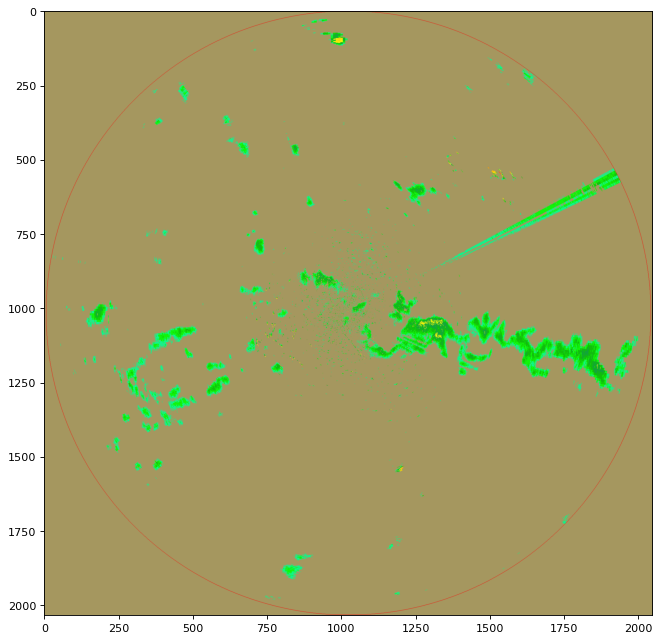

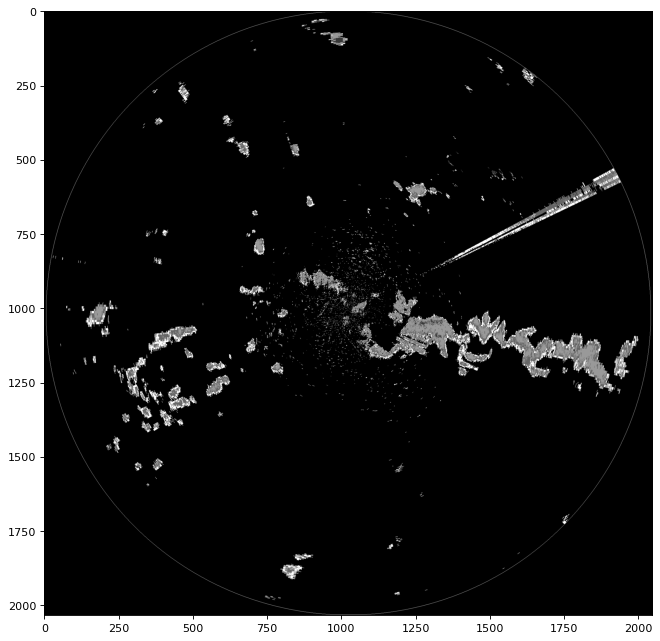

In [8]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(pic3, cmap='gray')
plt.show()